In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

In [3]:
df = pd.read_csv("datos/bikes.csv", index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
198,199,18-07-2018,autumn,0,7,0,1,1,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458
160,161,10-06-2018,summer,0,6,0,5,1,1,30.955000,35.16460,60.5000,9.417118,815,3771,4586
727,728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
630,631,23-09-2019,winter,1,9,0,0,0,1,21.695847,25.94665,46.7083,14.958286,2454,5453,7907
246,247,04-09-2018,autumn,0,9,0,0,0,1,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
271,272,29-09-2018,winter,0,9,0,4,1,1,25.283347,28.72560,69.9167,11.583161,653,4186,4839
516,517,01-06-2019,summer,1,6,0,5,1,2,26.820847,30.39810,75.5417,15.916721,533,3594,4127
202,203,22-07-2018,autumn,0,7,0,5,1,1,34.781653,42.04480,58.0417,8.917700,562,2825,3387
33,34,03-02-2018,spring,0,2,0,4,1,1,7.665237,8.89390,43.7826,18.609384,61,1489,1550
13,14,14-01-2018,spring,0,1,0,5,1,1,6.595670,9.42065,53.7826,8.478716,54,1367,1421


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [6]:
df['dteday'] = pd.to_datetime(df['dteday'], format= '%d-%m-%Y')

In [7]:
df.sample(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
100,101,2018-04-11,summer,0,4,0,1,1,2,24.421732,28.26085,71.6956,21.739758,855,2493,3348
125,126,2018-05-06,summer,0,5,0,5,1,1,19.645847,23.70585,59.0000,15.292482,894,3714,4608
36,37,2018-02-06,spring,0,2,0,0,0,1,11.719153,14.58355,56.8333,9.500600,354,1269,1623
598,599,2019-08-22,autumn,1,8,0,3,1,1,27.367500,31.09270,67.7083,4.708981,1094,6281,7375
260,261,2018-09-18,autumn,0,9,0,0,0,1,20.807500,24.52685,69.5000,11.958361,1353,2921,4274
370,371,2019-01-06,spring,1,1,0,5,1,1,13.700847,17.01335,54.2083,11.249836,307,3791,4098
649,650,2019-10-12,winter,1,10,0,5,1,1,17.937500,21.65355,53.9167,15.751164,1060,6222,7282
232,233,2018-08-21,autumn,0,8,0,0,0,1,29.144153,33.77625,77.0000,16.666518,1249,2624,3873
348,349,2018-12-15,winter,0,12,0,4,1,2,17.322500,20.61185,63.4167,17.958814,181,3528,3709
255,256,2018-09-13,autumn,0,9,0,2,1,1,26.684153,30.17770,71.2500,9.500868,701,4062,4763


In [8]:
pd.date_range(start= '2018-03-21', end='2018-06-21')

DatetimeIndex(['2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
               '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28',
               '2018-03-29', '2018-03-30', '2018-03-31', '2018-04-01',
               '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09',
               '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13',
               '2018-04-14', '2018-04-15', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-21',
               '2018-04-22', '2018-04-23', '2018-04-24', '2018-04-25',
               '2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29',
               '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
               '2018-05-04', '2018-05-05', '2018-05-06', '2018-05-07',
               '2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11',
               '2018-05-12', '2018-05-13', '2018-05-14', '2018-05-15',
      

In [9]:
'2018-05-02' in pd.date_range(start= '2018-03-21', end='2018-06-21')

True

In [10]:
def estaciones(dato):

    primavera = np.union1d(pd.date_range(start= '2018-03-21', end='2018-06-21'),pd.date_range(start= '2019-03-21', end='2019-06-21'))
    verano = np.union1d(pd.date_range(start= '2018-06-22', end='2018-09-22'),pd.date_range(start= '2019-06-22', end='2019-09-22'))
    otoño = np.union1d(pd.date_range(start= '2018-09-23', end='2018-12-21'),pd.date_range(start= '2019-09-23', end='2019-12-21'))
    invierno = np.union1d(pd.date_range(start= '2018-12-22', end='2018-03-20'),pd.date_range(start= '2019-12-22', end='2019-03-20'))

    if dato in primavera:
        return 'spring'
    elif dato in verano:
        return 'summer'
    elif dato in otoño:
        return 'autumn'
    else:
        return 'winter'

In [11]:
df['season'] = df['dteday'].apply(estaciones)

In [12]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            720, 721, 722, 723, 724, 725, 726, 727, 728, 729],
           dtype='int64', length=730)

In [13]:
def exploracion(dataframe):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
                nombre (string): un titulo para el dataframe
    '''
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(dataframe.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum().reset_index())
    print(".............................................")
    print(f"El porcentaje de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum() * 100 / dataframe.shape[0])
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe().T)
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object).T)
    print(".............................................")

In [14]:
exploracion(df)

.............................................
En el dataframe hay 730 filas y 16 columnas.
.............................................
5 filas aleatorias:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
612,613,2019-09-05,summer,1,9,0,3,1,1,30.203347,35.44915,74.125,12.583136,832,6280,7112
265,266,2018-09-23,autumn,0,9,0,5,1,2,24.975847,26.10625,97.250,5.250569,258,2137,2395
661,662,2019-10-24,autumn,1,10,0,3,1,1,24.087500,27.93605,63.625,4.876206,795,6898,7693
223,224,2018-08-12,summer,0,8,0,5,1,1,29.041653,32.70210,41.500,8.416607,1051,3854,4905
497,498,2019-05-13,spring,1,5,0,0,0,1,25.112500,29.26190,57.625,15.082839,2172,3946,6118


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,instant,int64
1,dteday,datetime64[ns]
2,season,object
3,yr,int64
4,mnth,int64
5,holiday,int64
6,weekday,int64
7,workingday,int64
8,weathersit,int64
9,temp,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,instant,0
1,dteday,0
2,season,0
3,yr,0
4,mnth,0
5,holiday,0
6,weekday,0
7,workingday,0
8,weathersit,0
9,temp,0


.............................................
El porcentaje de nulos por columna del dataframe son:


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


.............................................
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
season,730,4,spring,186


.............................................


Tras ver el análisis hemos decidido prescindir de las columnas instant y cnt 

In [15]:
df.drop(['instant', 'cnt'], axis=1, inplace=True)

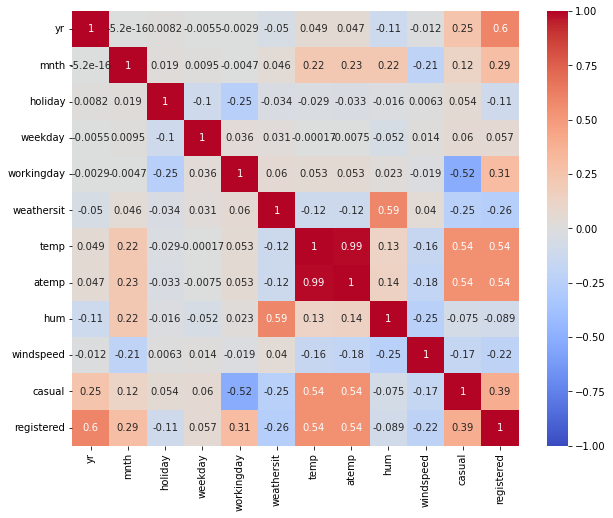

In [16]:
sns.heatmap(df.corr(), annot=True, vmin= -1, vmax=1, cmap='coolwarm');

In [17]:
mask = np.triu(np.ones_like(df.corr(),dtype = np.bool_))

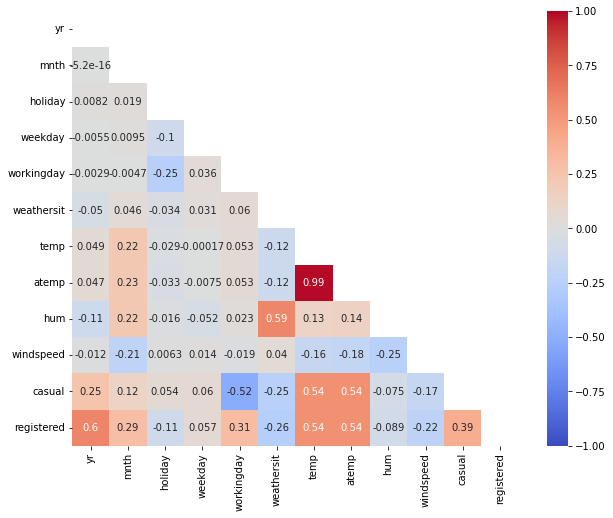

In [18]:
sns.heatmap(df.corr(),
             cmap = 'coolwarm',
             annot = True,
             mask = mask,
             vmin = -1,
             vmax= 1);

Puesto que temp y atemp tienen una correlación muy alta (cercana a 1), hemos decidido prescindir de la de atemp (sensación térmica). La correlación de las dos con nuestras variables respuesta es igual. 

In [19]:
df.drop(['atemp'], axis=1, inplace=True)

In [20]:
df.to_csv('datos/bikes_clean.csv')

In [21]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518


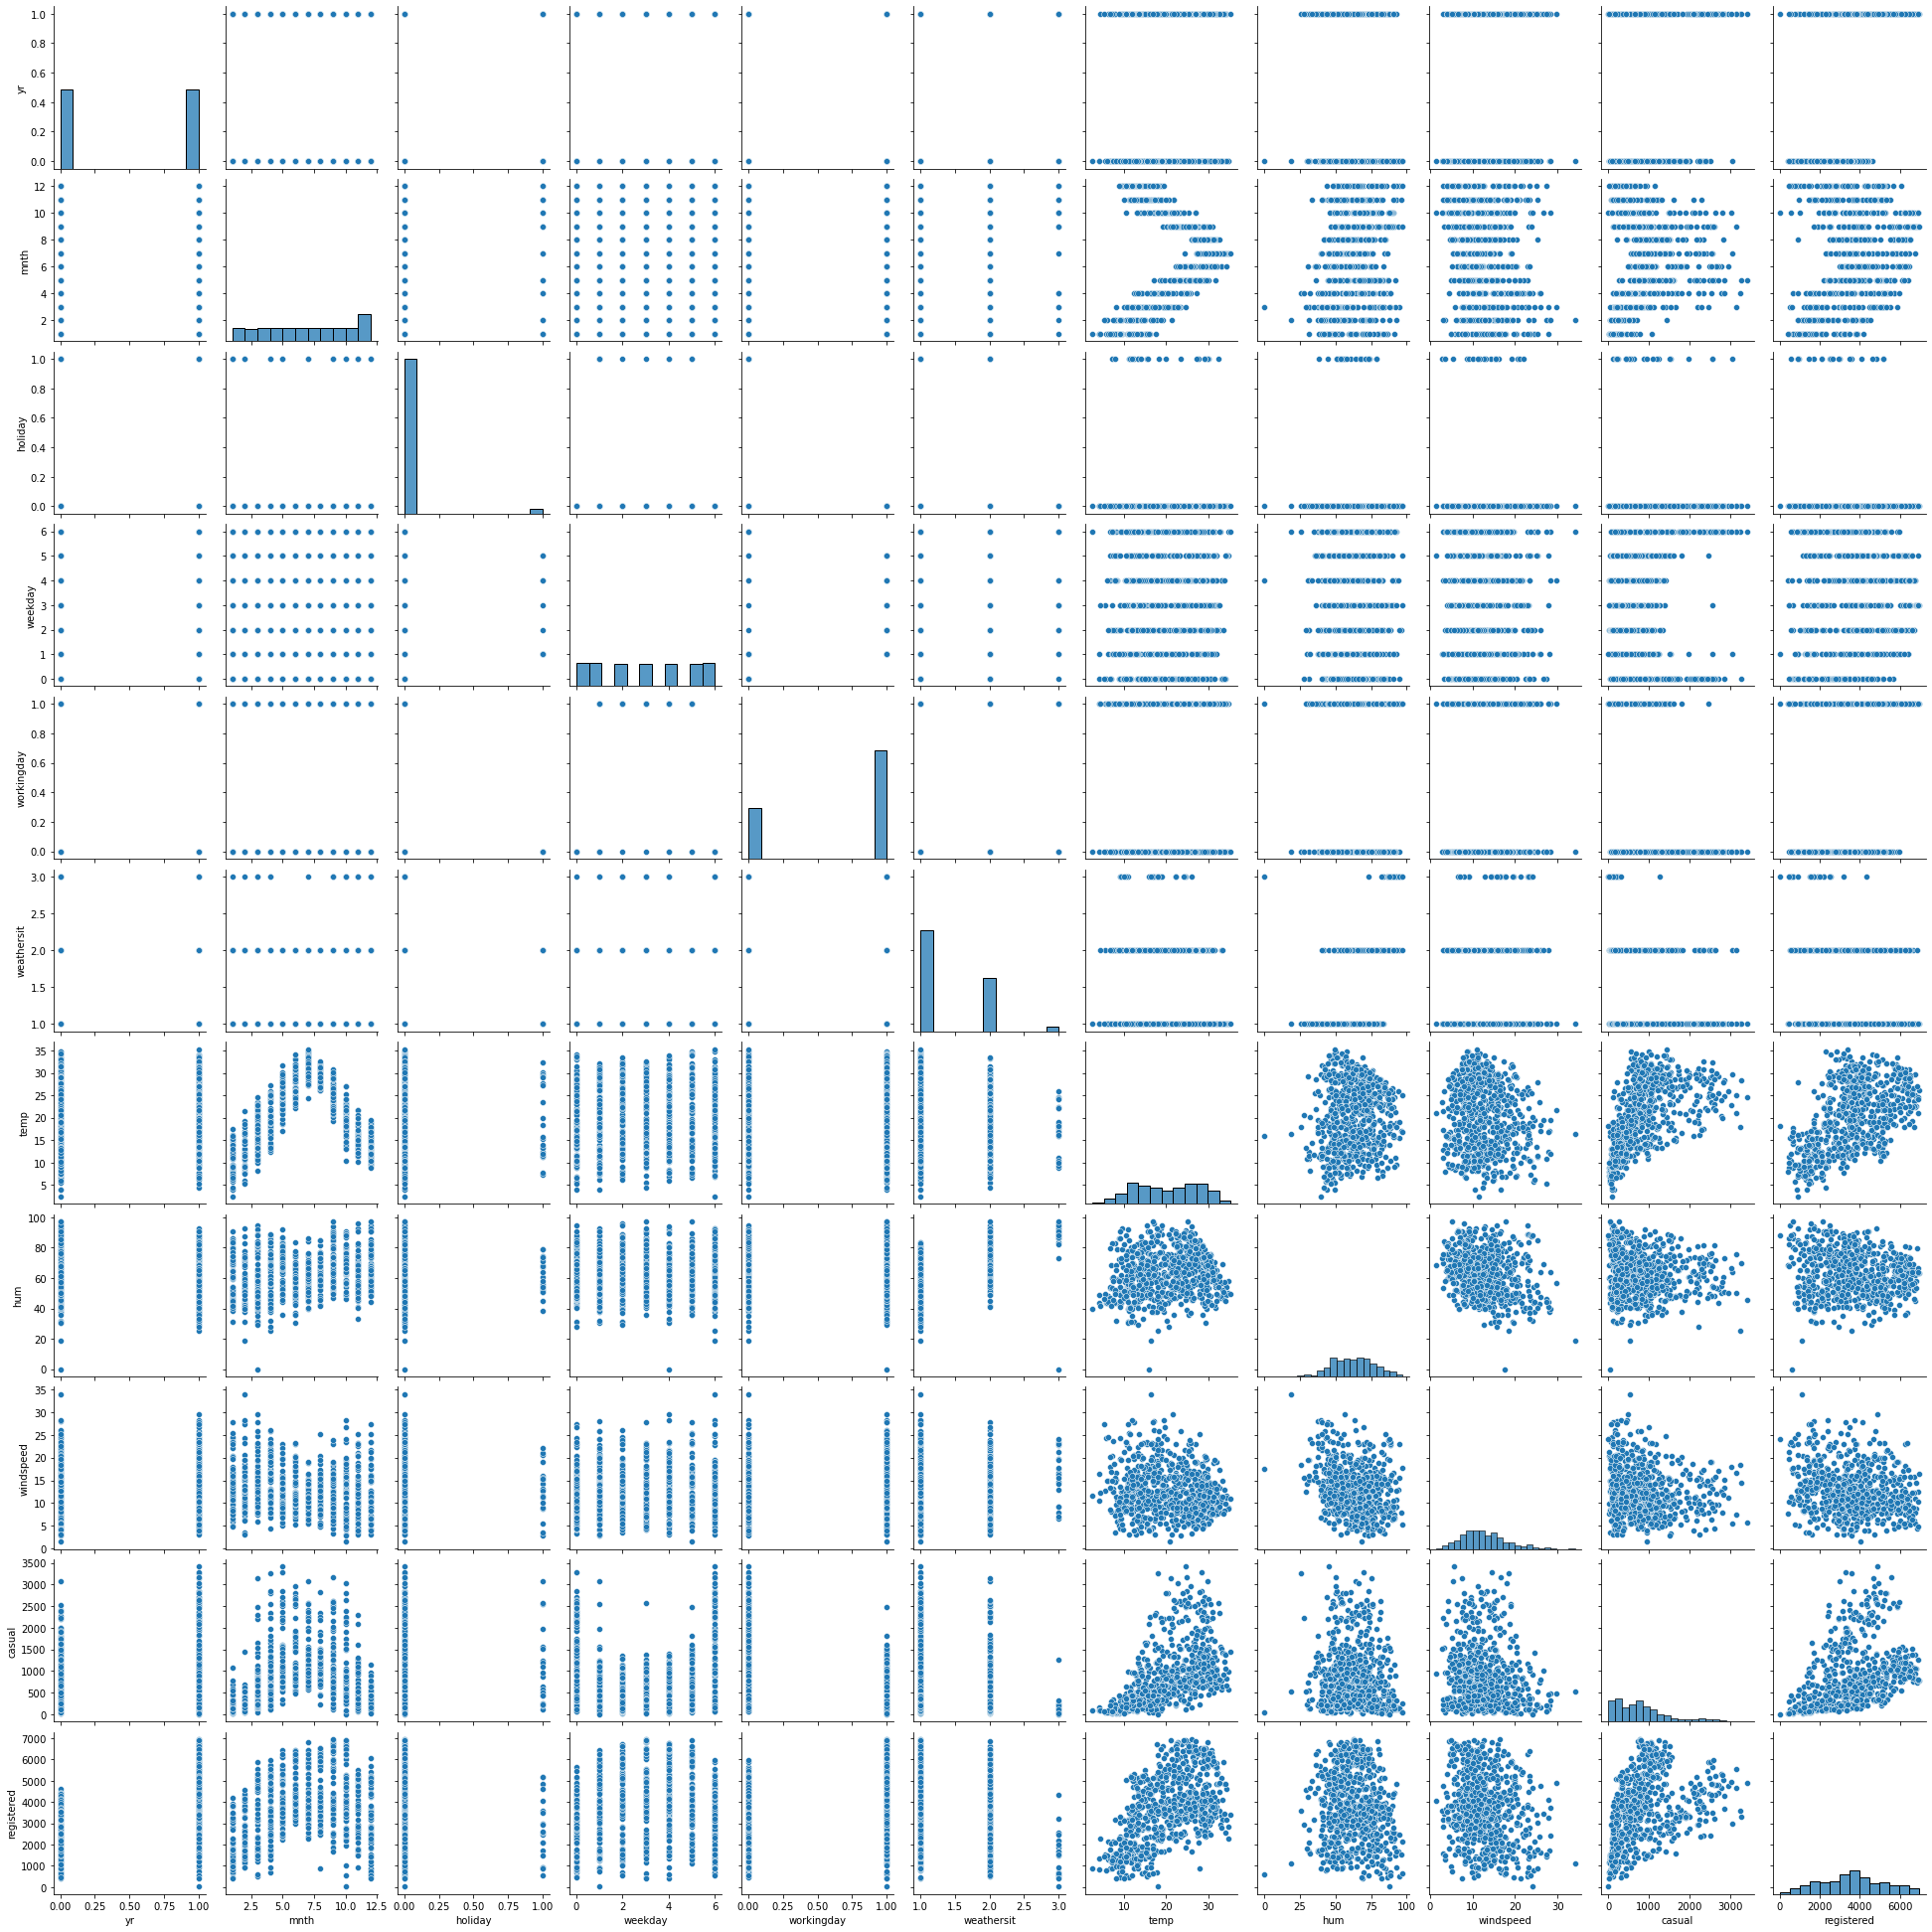

In [22]:
sns.pairplot(df)

In [23]:
df_numericas = df.select_dtypes(include=np.number)
df_categoricas = df.select_dtypes(include='object')

In [24]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518


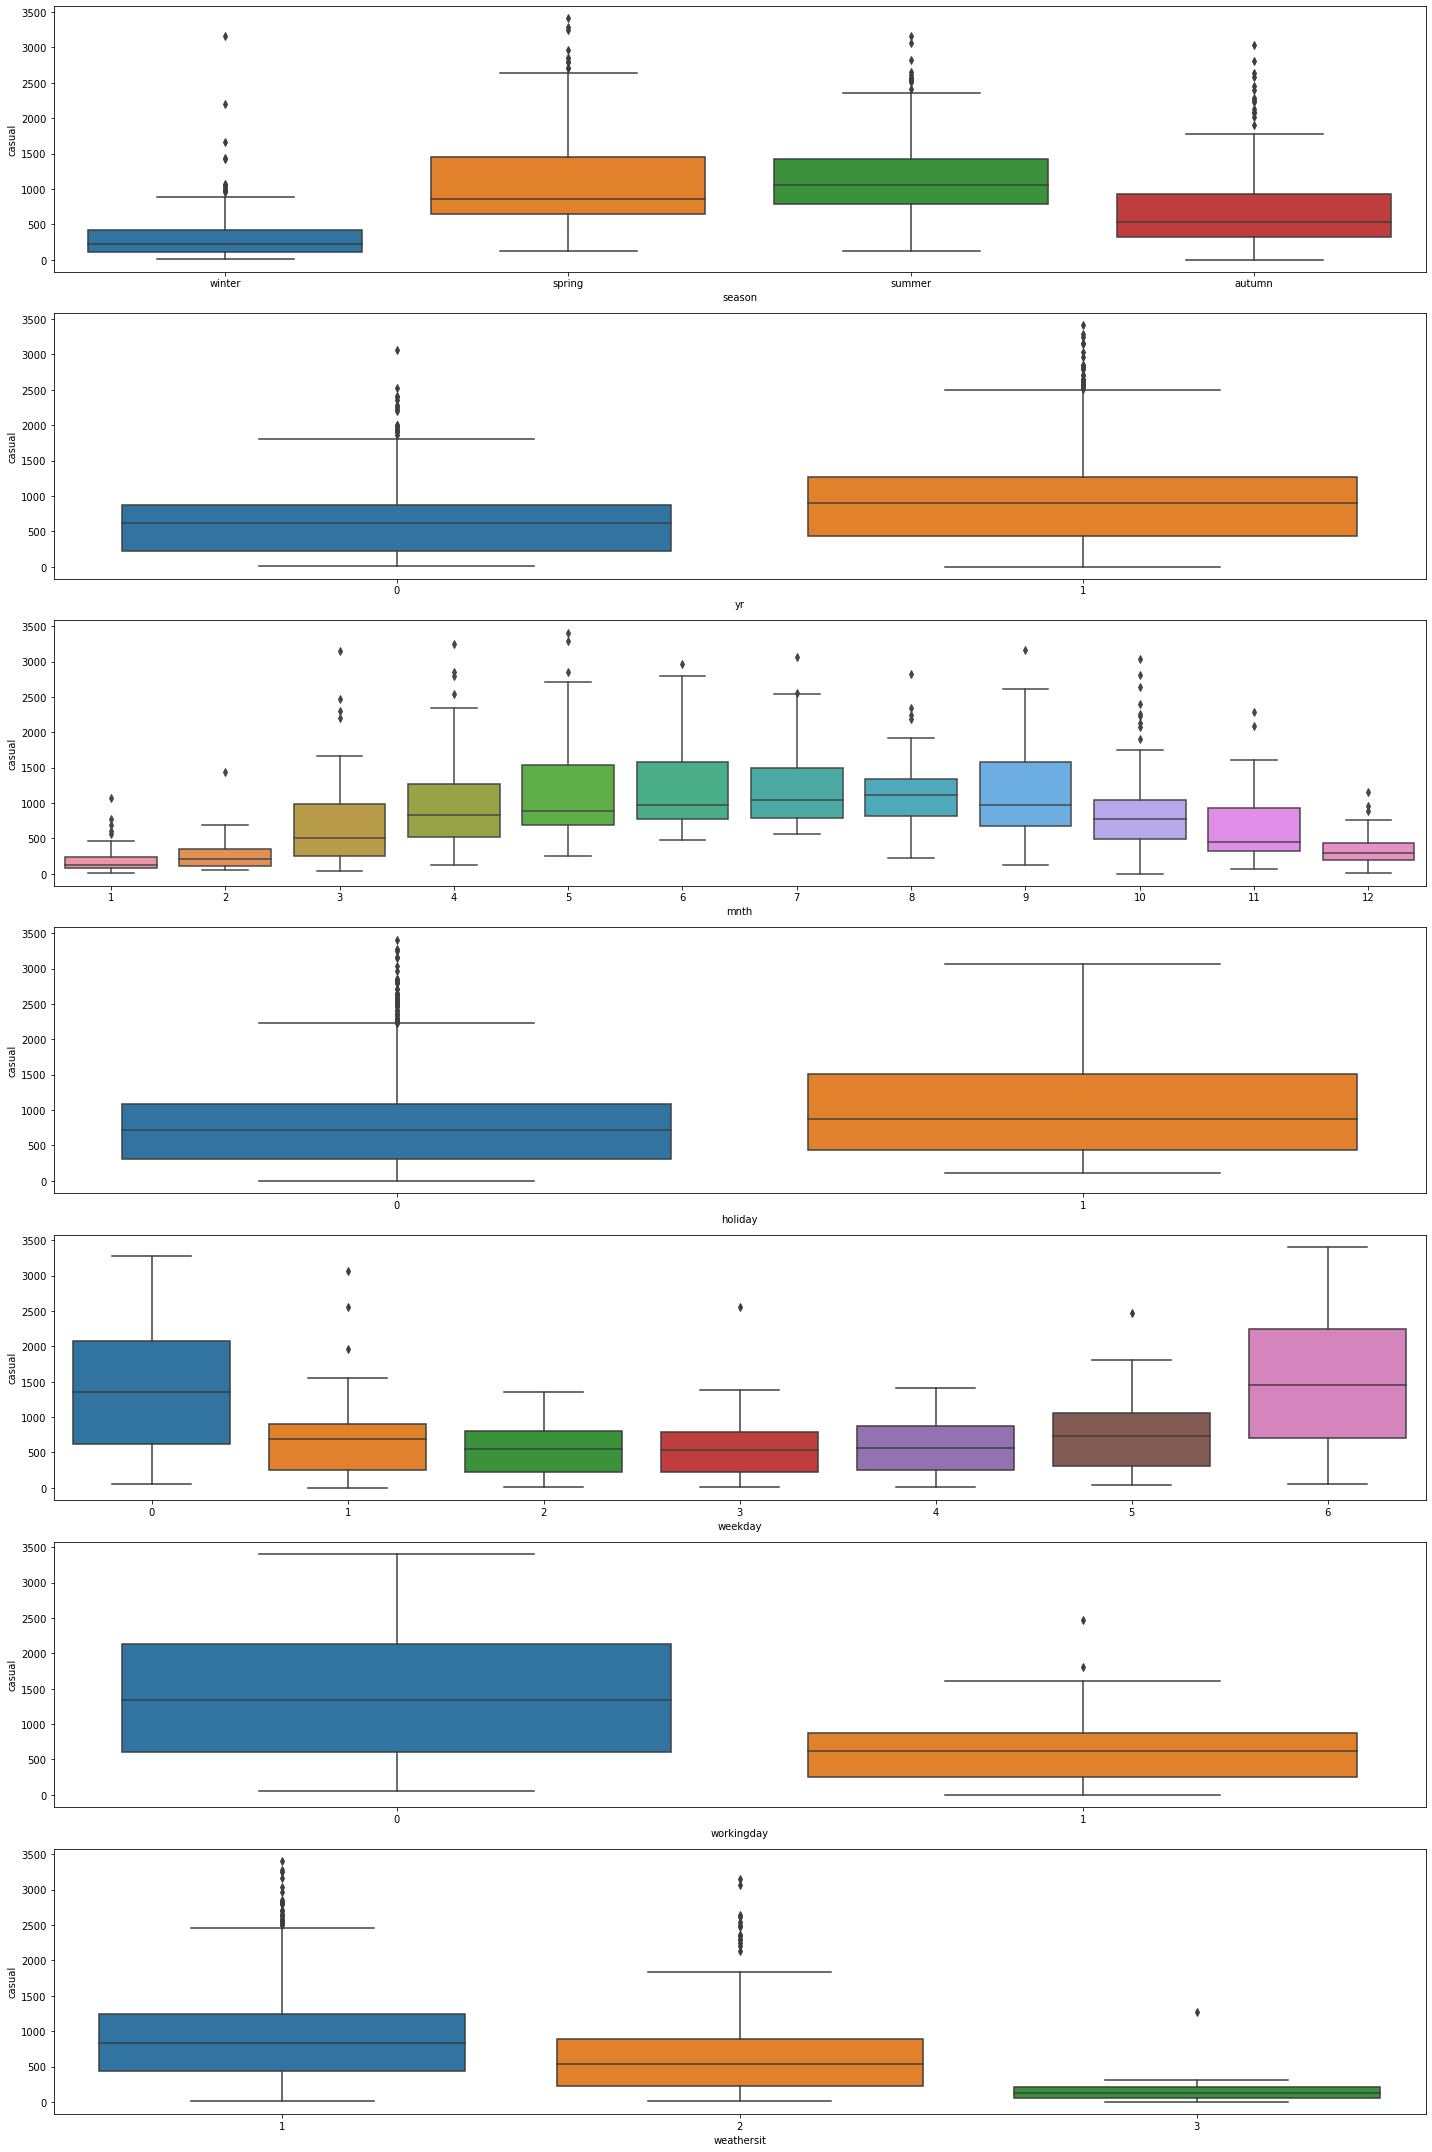

In [25]:
lista_categoricas = ["season", "yr", 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axes = plt.subplots(7, 1, figsize = (20, 30))

axes = axes.flat

for i, columna in enumerate(lista_categoricas):
    sns.boxplot(x=df[columna], y = df["casual"], data = df, ax = axes[i])
    
plt.tight_layout()
plt.show();

In [26]:
df['weathersit'].unique()

array([2, 1, 3])

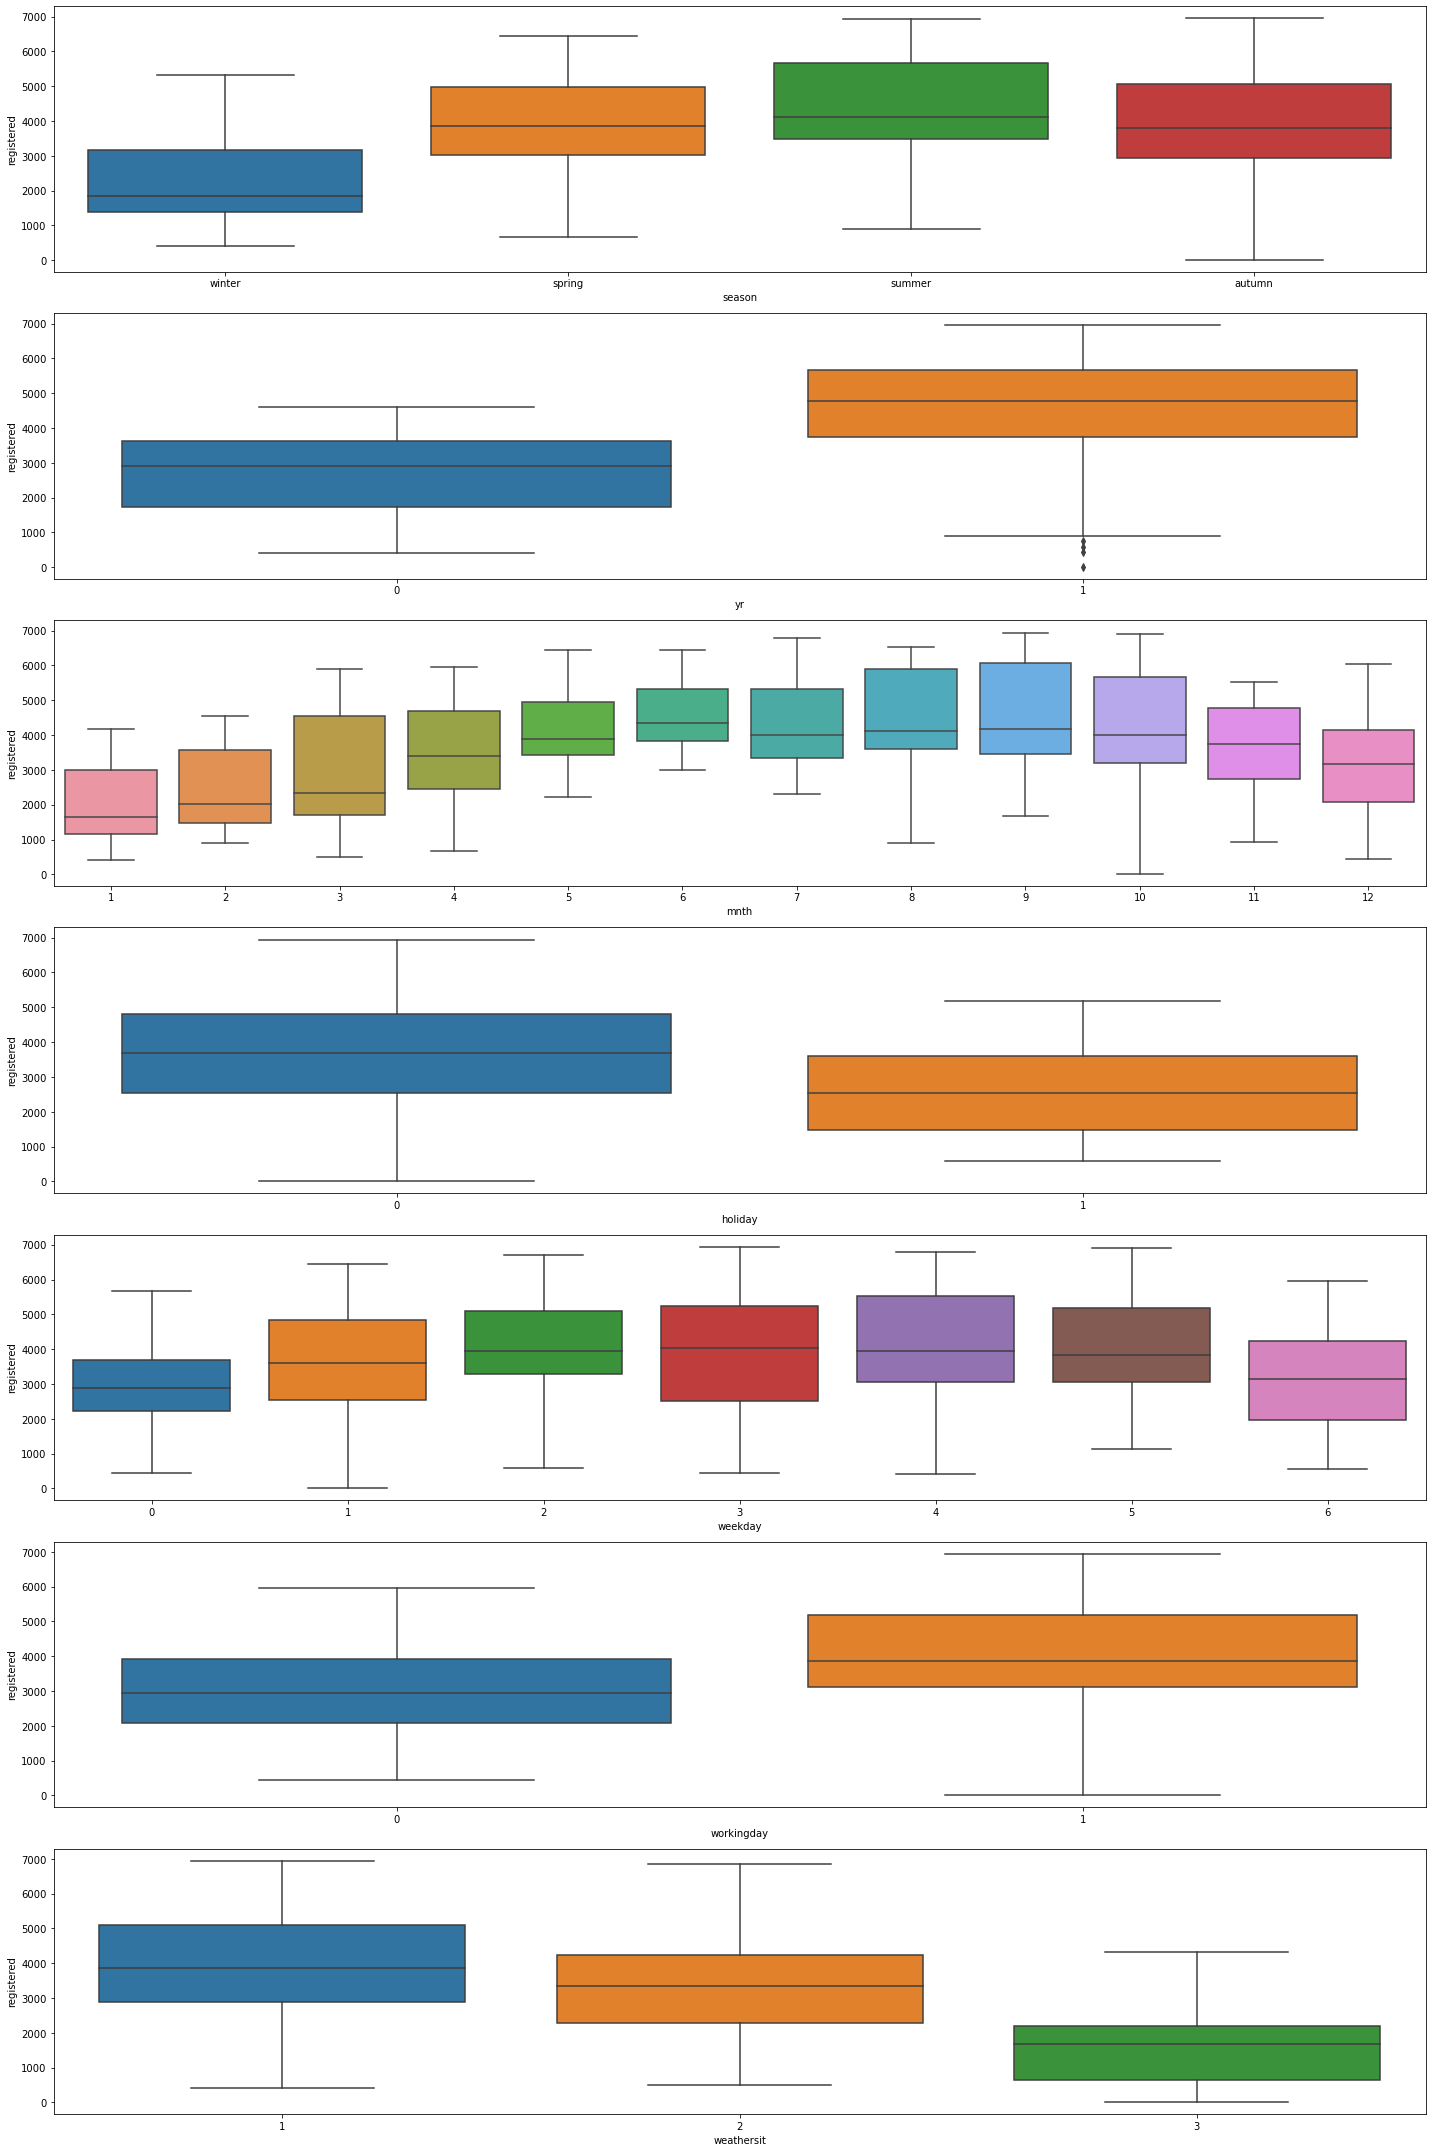

In [27]:
lista_categoricas = ["season", "yr", 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axes = plt.subplots(7, 1, figsize = (20, 30))

axes = axes.flat

for i, columna in enumerate(lista_categoricas):
    sns.boxplot(x=df[columna], y = df["registered"], data = df, ax = axes[i])
    
plt.tight_layout()
plt.show();

In [28]:
df_numericas.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518


In [29]:
df_numericas.drop(['yr','mnth','holiday','weekday','workingday','weathersit'], axis= 1, inplace=True)

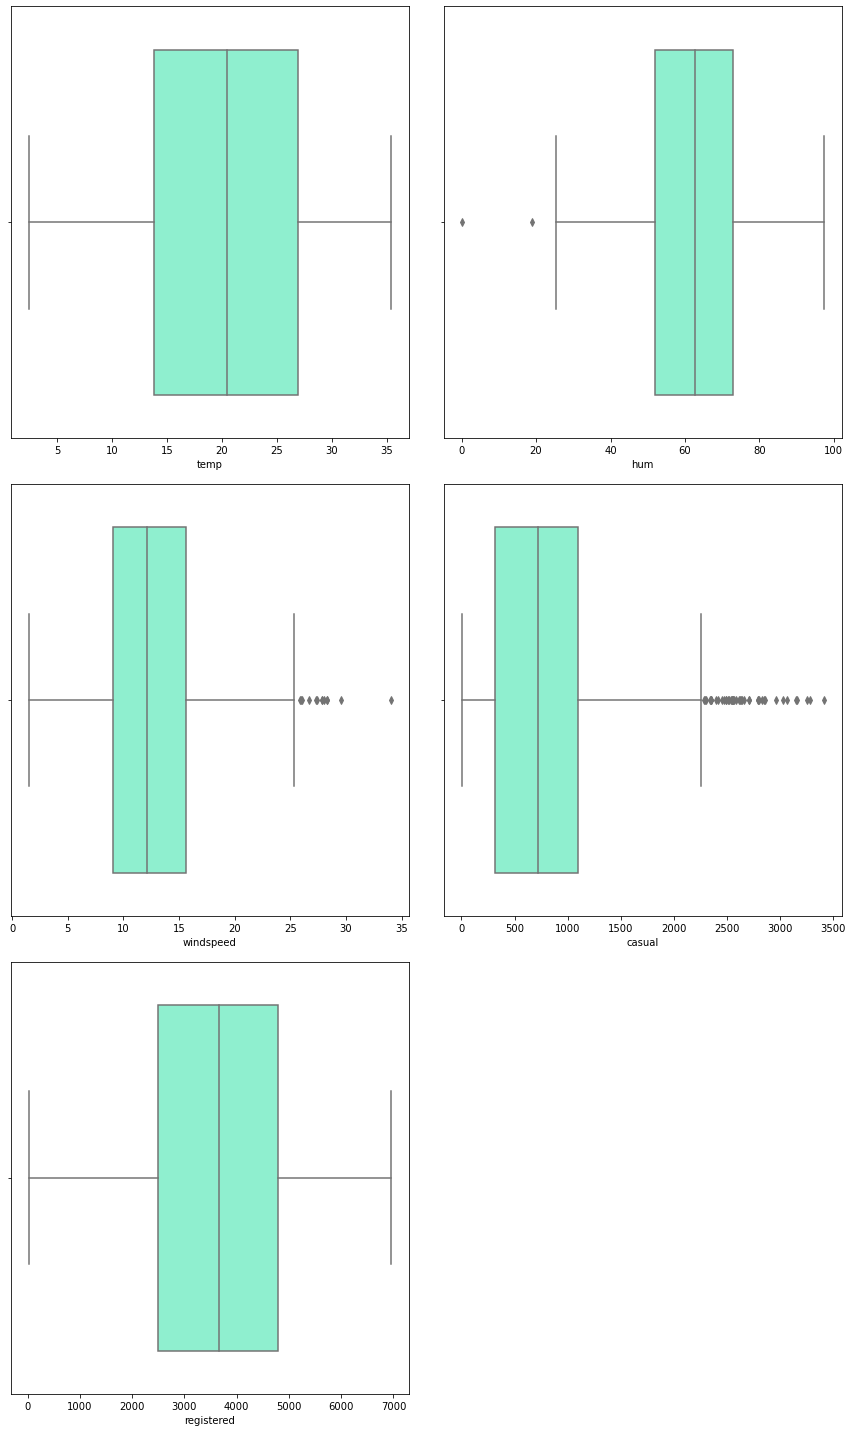

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    # para trazar una línea de densidad
    sns.boxplot(x=df_numericas[columna], data=df_numericas,
                ax=axes[indice], color="aquamarine")


plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [31]:
df_numericas.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered'], dtype='object')

In [32]:
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {}
    df = pd.DataFrame()
    for col in lista_columnas:
        Q1 = np.percentile(dataframe[col], 25)
        Q3 = np.percentile(dataframe[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < (Q1 - outlier_step)) | (dataframe[col] > (Q3 + outlier_step))]
        df = pd.concat([df, outliers_data], axis=0)
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))
    return df, dicc_indices

In [33]:
detectar_outliers(df_numericas.columns, df_numericas)

(          temp      hum  windspeed  casual  registered
 49   16.365847  18.7917  34.000021     532        1103
 68   15.952731   0.0000  17.545759      46         577
 44   17.015000  37.5833  27.999836     208        1705
 49   16.365847  18.7917  34.000021     532        1103
 93   23.506653  42.6250  25.833257     734        2381
 94   16.980847  64.2083  26.000489     167        1628
 292  19.509153  63.6250  28.292425     471        3724
 382  12.436653  44.3333  27.833743     109        3267
 407   5.227500  46.4583  27.417204      73        1456
 420  11.924153  39.5833  28.250014     317        2415
 431  21.627500  56.7500  29.584721     486        4896
 432  16.844153  40.7083  27.791600     447        4122
 449  18.279153  47.7917  25.917007     795        4763
 665  19.577500  69.4583  26.666536     998        3461
 720  10.899153  44.1250  27.292182     205        1544
 148  27.367500  81.8750  14.333846    2355        2433
 183  29.383347  68.2500  15.333486    2282     

sacar medias y tratar de ponderar los pesos